In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('US_Accidents_June20.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.Source.value_counts()

MapQuest         2414301
Bing             1034799
MapQuest-Bing      64517
Name: Source, dtype: int64

In [3]:
df.columns

Index(['Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df_update=df.drop(['TMC','Severity','End_Time','Distance(mi)','End_Lat','End_Lng','Description', 'Number', 'Street', 'Side', 'City', 'County', 'State','Zipcode', 'Country', 'Timezone', 'Airport_Code','Weather_Timestamp', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Wind_Direction','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight','Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis=1, inplace=True)


In [5]:
df.columns

Index(['Source', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [6]:
df.dtypes

Source                object
Start_Time            object
Start_Lat            float64
Start_Lng            float64
Temperature(F)       float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Sunrise_Sunset        object
dtype: object

In [7]:
df["Start_Time"]= df.Start_Time.apply(lambda x: x.split()[0])
df

,Source,Start_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
ID,,,,,,,,,,
A-1,MapQuest,2016-02-08,39.865147,-84.058723,36.9,10.0,NaN,0.02,Light Rain,Night
A-2,MapQuest,2016-02-08,39.928059,-82.831184,37.9,10.0,NaN,0.00,Light Rain,Night
A-3,MapQuest,2016-02-08,39.063148,-84.032608,36.0,10.0,3.5,NaN,Overcast,Night
A-4,MapQuest,2016-02-08,39.747753,-84.205582,35.1,9.0,4.6,NaN,Mostly Cloudy,Night
A-5,MapQuest,2016-02-08,39.627781,-84.188354,36.0,6.0,3.5,NaN,Mostly Cloudy,Day
...,...,...,...,...,...,...,...,...,...,...
A-3513776,Bing,2019-08-23,34.002480,-117.379360,86.0,10.0,13.0,0.00,Fair,Day
A-3513777,Bing,2019-08-23,32.766960,-117.148060,70.0,10.0,6.0,0.00,Fair,Day
A-3513778,Bing,2019-08-23,33.775450,-117.847790,73.0,10.0,10.0,0.00,Partly Cloudy,Day


In [8]:
df_y=pd.DataFrame(df.Start_Time.value_counts())
df_y.columns=['Number_of_Accidents']
df_y

,Number_of_Accidents
2019-12-04,4883
2020-04-06,4718
2020-06-26,4678
2020-02-06,4654
2020-06-19,4651
...,...
2016-02-20,4
2016-10-28,3
2020-05-04,2
2019-08-24,2


In [9]:
df_x=df.groupby(['Start_Time']).mean()
df_x.rename(columns = {'Precipitation(in)':'Precipitation'}, inplace = True) 
df_x.rename(columns = {'Visibility(mi)':'Visibility'}, inplace = True)
df_x.rename(columns = {'Wind_Speed(mph)':'Wind_Speed'}, inplace = True)
df_x.rename(columns = {'Temperature(F)':'Temperature'}, inplace = True)

In [10]:
df_y=df_y.reindex(df_x.index)
df_y

,Number_of_Accidents
Start_Time,
2016-02-08,60
2016-02-09,59
2016-02-10,49
2016-02-11,93
2016-02-12,18
...,...
2020-06-26,4678
2020-06-27,2032
2020-06-28,1757


In [11]:
df_x['Number_of_Accidents']=df_y.Number_of_Accidents
df_x.fillna(0, inplace=True)
df_x.drop(['Start_Lat','Start_Lng'], axis=1, inplace=True)

In [12]:
df_x

,Temperature,Visibility,Wind_Speed,Precipitation,Number_of_Accidents
Start_Time,,,,,
2016-02-08,35.388333,7.130000,6.363265,0.019375,60
2016-02-09,23.532203,2.410169,11.461017,0.003846,59
2016-02-10,17.765306,3.875510,12.965957,0.002581,49
2016-02-11,15.888172,9.263441,9.069048,0.000000,93
2016-02-12,19.205556,8.416667,15.927778,0.000000,18
...,...,...,...,...,...
2020-06-26,79.928322,9.601001,7.875520,0.004406,4678
2020-06-27,76.871859,9.243358,8.223737,0.007686,2032
2020-06-28,74.290304,9.390959,8.876241,0.008698,1757


In [13]:
#Create the training and testing data sets.
mask = np.random.rand(len(df_x)) < 0.8
df_train = df_x[mask]
df_test = df_x[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=1292
Testing data set length=309


In [14]:
#Setup the regression expression in patsy notation. We are telling patsy that  is our dependent variable and
# it depends on the regression variables: 
expr = """Number_of_Accidents ~ Temperature  + Visibility + Wind_Speed + Precipitation"""
print(expr)

Number_of_Accidents ~ Temperature  + Visibility + Wind_Speed + Precipitation


In [15]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [16]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Accidents   No. Observations:                 1292
Model:                             GLM   Df Residuals:                     1287
Model Family:                  Poisson   Df Model:                            4
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:            -4.7966e+05
Date:                 Fri, 07 Aug 2020   Deviance:                   9.4739e+05
Time:                         13:07:08   Pearson chi2:                 8.05e+05
No. Iterations:                      5                                         
Covariance Type:             nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.5978      0.008 

In [17]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[2721.87895592 2093.96617906 2143.56699901 ... 2172.19644979 2038.07019616
 2162.43363001]
1292


In [18]:
df_train['Number_of_Accidents_LAMBDA'] = poisson_training_results.mu

C:\Users\rams\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['Number_of_Accidents'] - x['Number_of_Accidents_LAMBDA'])**2 - x['Number_of_Accidents']) / x['Number_of_Accidents_LAMBDA'], axis=1)

C:\Users\rams\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
ols_expr = """AUX_OLS_DEP ~ Number_of_Accidents_LAMBDA - 1"""

In [21]:
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [22]:
print(aux_olsr_results.params)

Number_of_Accidents_LAMBDA    0.281874
dtype: float64


In [23]:
aux_olsr_results.tvalues

Number_of_Accidents_LAMBDA    38.766043
dtype: float64

In [24]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [25]:
print(nb2_training_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Accidents   No. Observations:                 1292
Model:                             GLM   Df Residuals:                     1287
Model Family:         NegativeBinomial   Df Model:                            4
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -11263.
Date:                 Fri, 07 Aug 2020   Deviance:                       2608.6
Time:                         13:07:08   Pearson chi2:                 1.33e+03
No. Iterations:                      8                                         
Covariance Type:             nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7775      0.201 

In [26]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [27]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

                   mean     mean_se  mean_ci_lower  mean_ci_upper
Start_Time                                                       
2016-02-10  1883.605337  221.367357    1496.077079    2371.514888
2016-02-12  1241.128812  104.716172    1051.960711    1464.313935
2016-02-14  2308.538633  165.869285    2005.293872    2657.640705
2016-02-16  2862.172026  289.519108    2347.435140    3489.778512
2016-02-18  2573.333024  127.716179    2334.803369    2836.231496
...                 ...         ...            ...            ...
2020-05-30  2136.409300   43.663430    2052.521918    2223.725193
2020-06-02  2086.366898   54.407134    1982.410164    2195.775078
2020-06-21  2351.238735   65.273071    2226.724059    2482.716064
2020-06-27  2132.541631   57.520093    2022.732438    2248.312097
2020-06-30  2364.889067   65.229448    2240.436011    2496.255314

[309 rows x 4 columns]


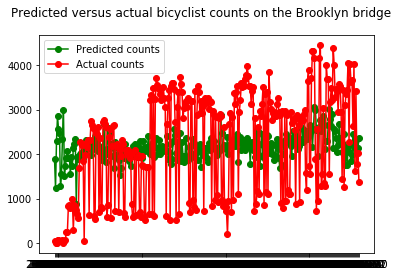

In [28]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Number_of_Accidents']
fig = plt.figure()
fig.suptitle('Predicted versus actual Number of Accidents')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts' );
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

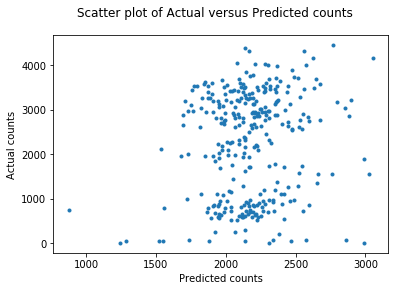

In [29]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()